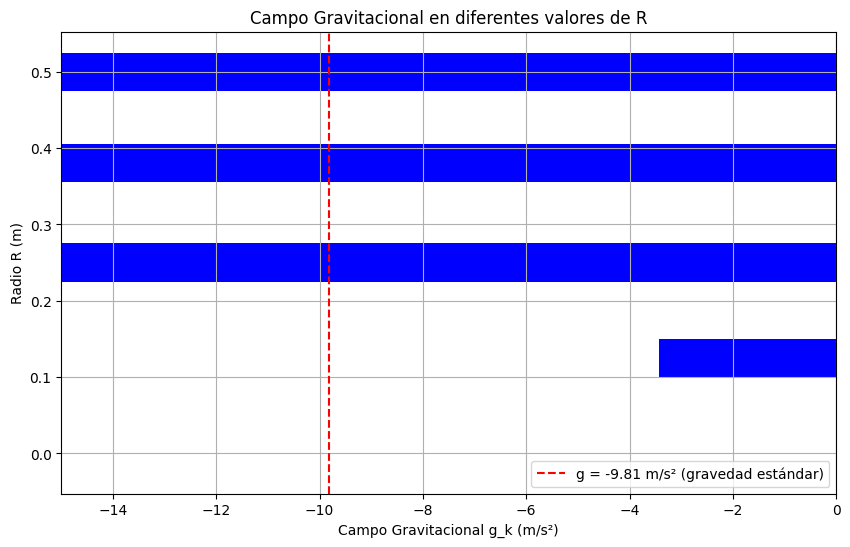

Campo gravitacional en R = 0.00: -0.000000 m/s²
Campo gravitacional en R = 0.12: -3.430697 m/s²
Campo gravitacional en R = 0.25: -60.766336 m/s²
Campo gravitacional en R = 0.38: -112.247601 m/s²
Campo gravitacional en R = 0.50: -137.957947 m/s²


In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_legendre


k = 1.9429303960
N = 50


r_points, r_weights = roots_legendre(N)
phi_points, phi_weights = roots_legendre(N)


def integrand(r, phi, z):

    x = r * np.cos(phi)
    y = r * np.sin(phi)
    denominator = (x**2 + y**2 + z**2 - 2 * r * x * np.cos(phi) - 2 * r * y * np.sin(phi))

    if denominator <= 0:
        return 0
    return (r * z) / (denominator ** (3/2))


def gk(z, R):
    result = 0.0


    for j in range(N):
        for i in range(N):

            r_transformed = (R / 2) * (r_points[i] + 1)  # Transformar r a [0, R]
            phi_transformed = np.pi * (phi_points[j] + 1)  # Transformar phi a [0, 2pi]


            integrand_value = integrand(r_transformed, phi_transformed, z)


            result += r_weights[i] * r_weights[j] * integrand_value


    result *= (R / 2) * (np.pi)
    return -k * result


R_fixed = [0, 0.125, 0.25, 0.38, 0.5]  # Valores de R
z = 0.2  # Altura constante
g_values = []  # Lista para almacenar los valores de g


for R in R_fixed:
    g_field = gk(z, R)  # Calcular el campo gravitacional
    g_values.append(g_field)


plt.figure(figsize=(10, 6))
plt.barh(R_fixed, g_values, color='blue', height=0.05)
plt.axvline(x=-9.81, color='r', linestyle='--', label='g = -9.81 m/s² (gravedad estándar)')
plt.title('Campo Gravitacional en diferentes valores de R')
plt.xlabel('Campo Gravitacional g_k (m/s²)')
plt.ylabel('Radio R (m)')
plt.legend()
plt.grid()
plt.xlim(-15, 0)  # Limitar el eje x para mejor visualización
plt.show()

# Mostrar resultados
for R, g_field in zip(R_fixed, g_values):
    print(f"Campo gravitacional en R = {R:.2f}: {g_field:.6f} m/s²")

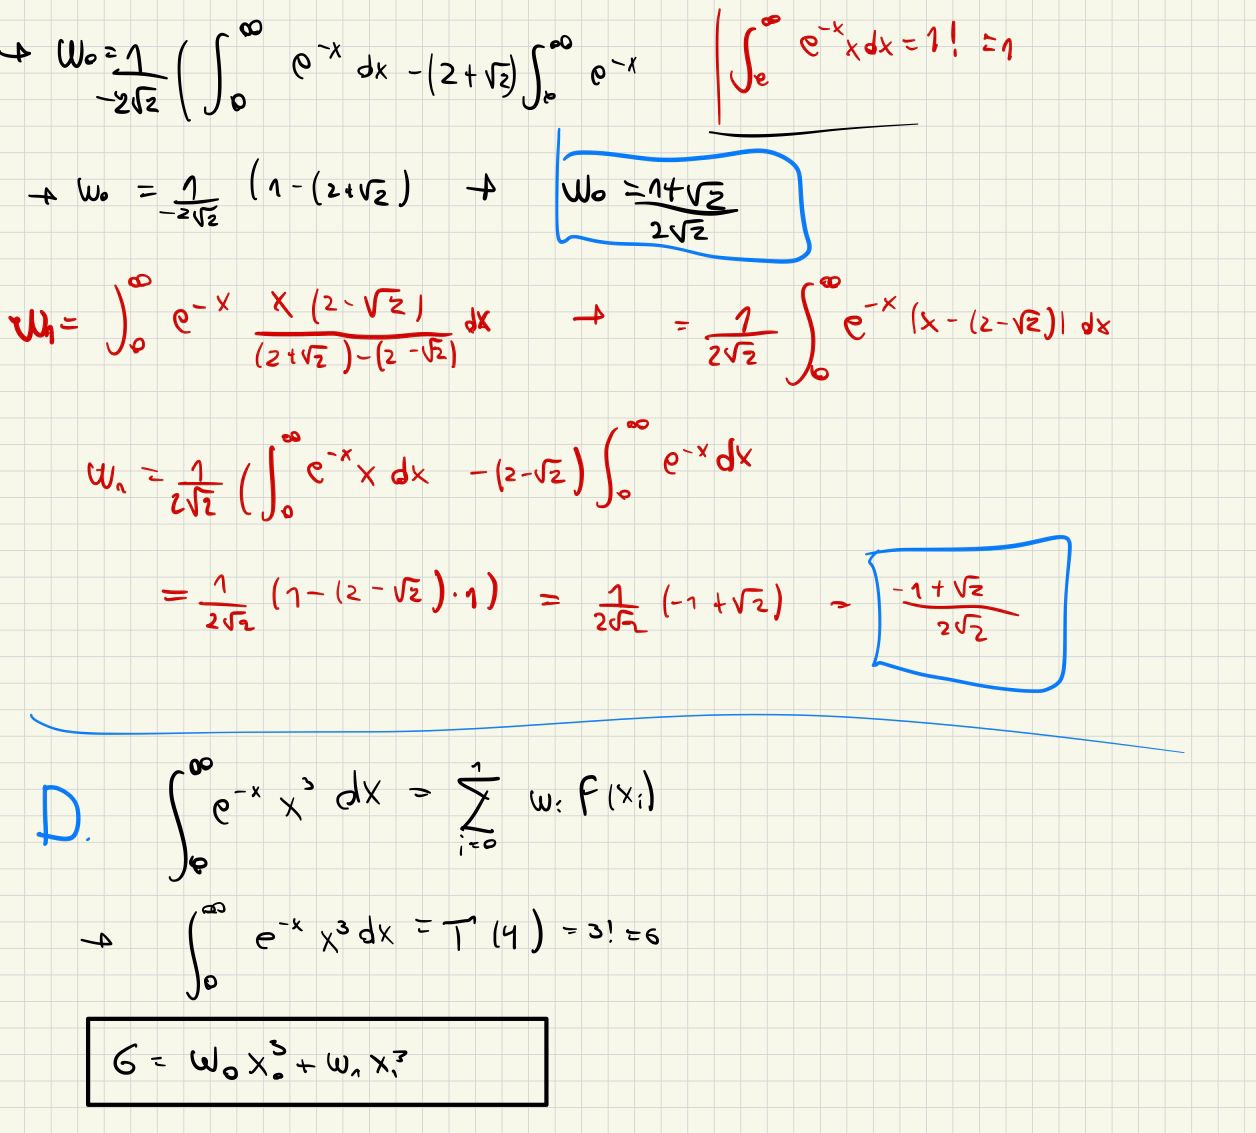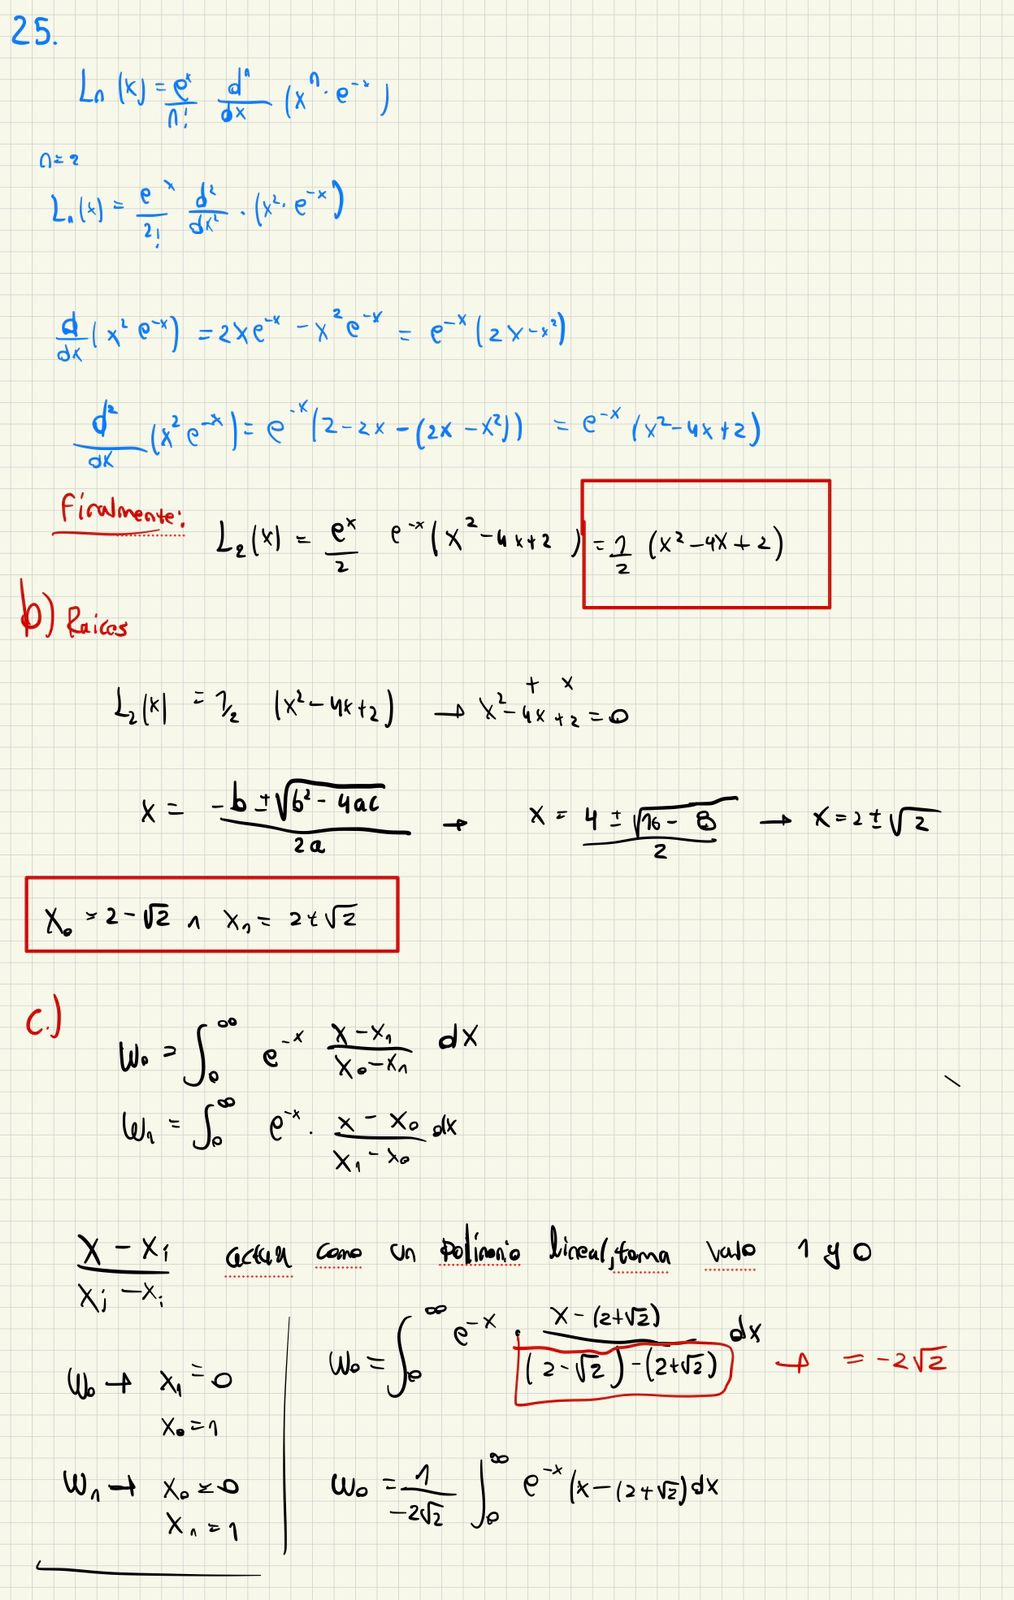

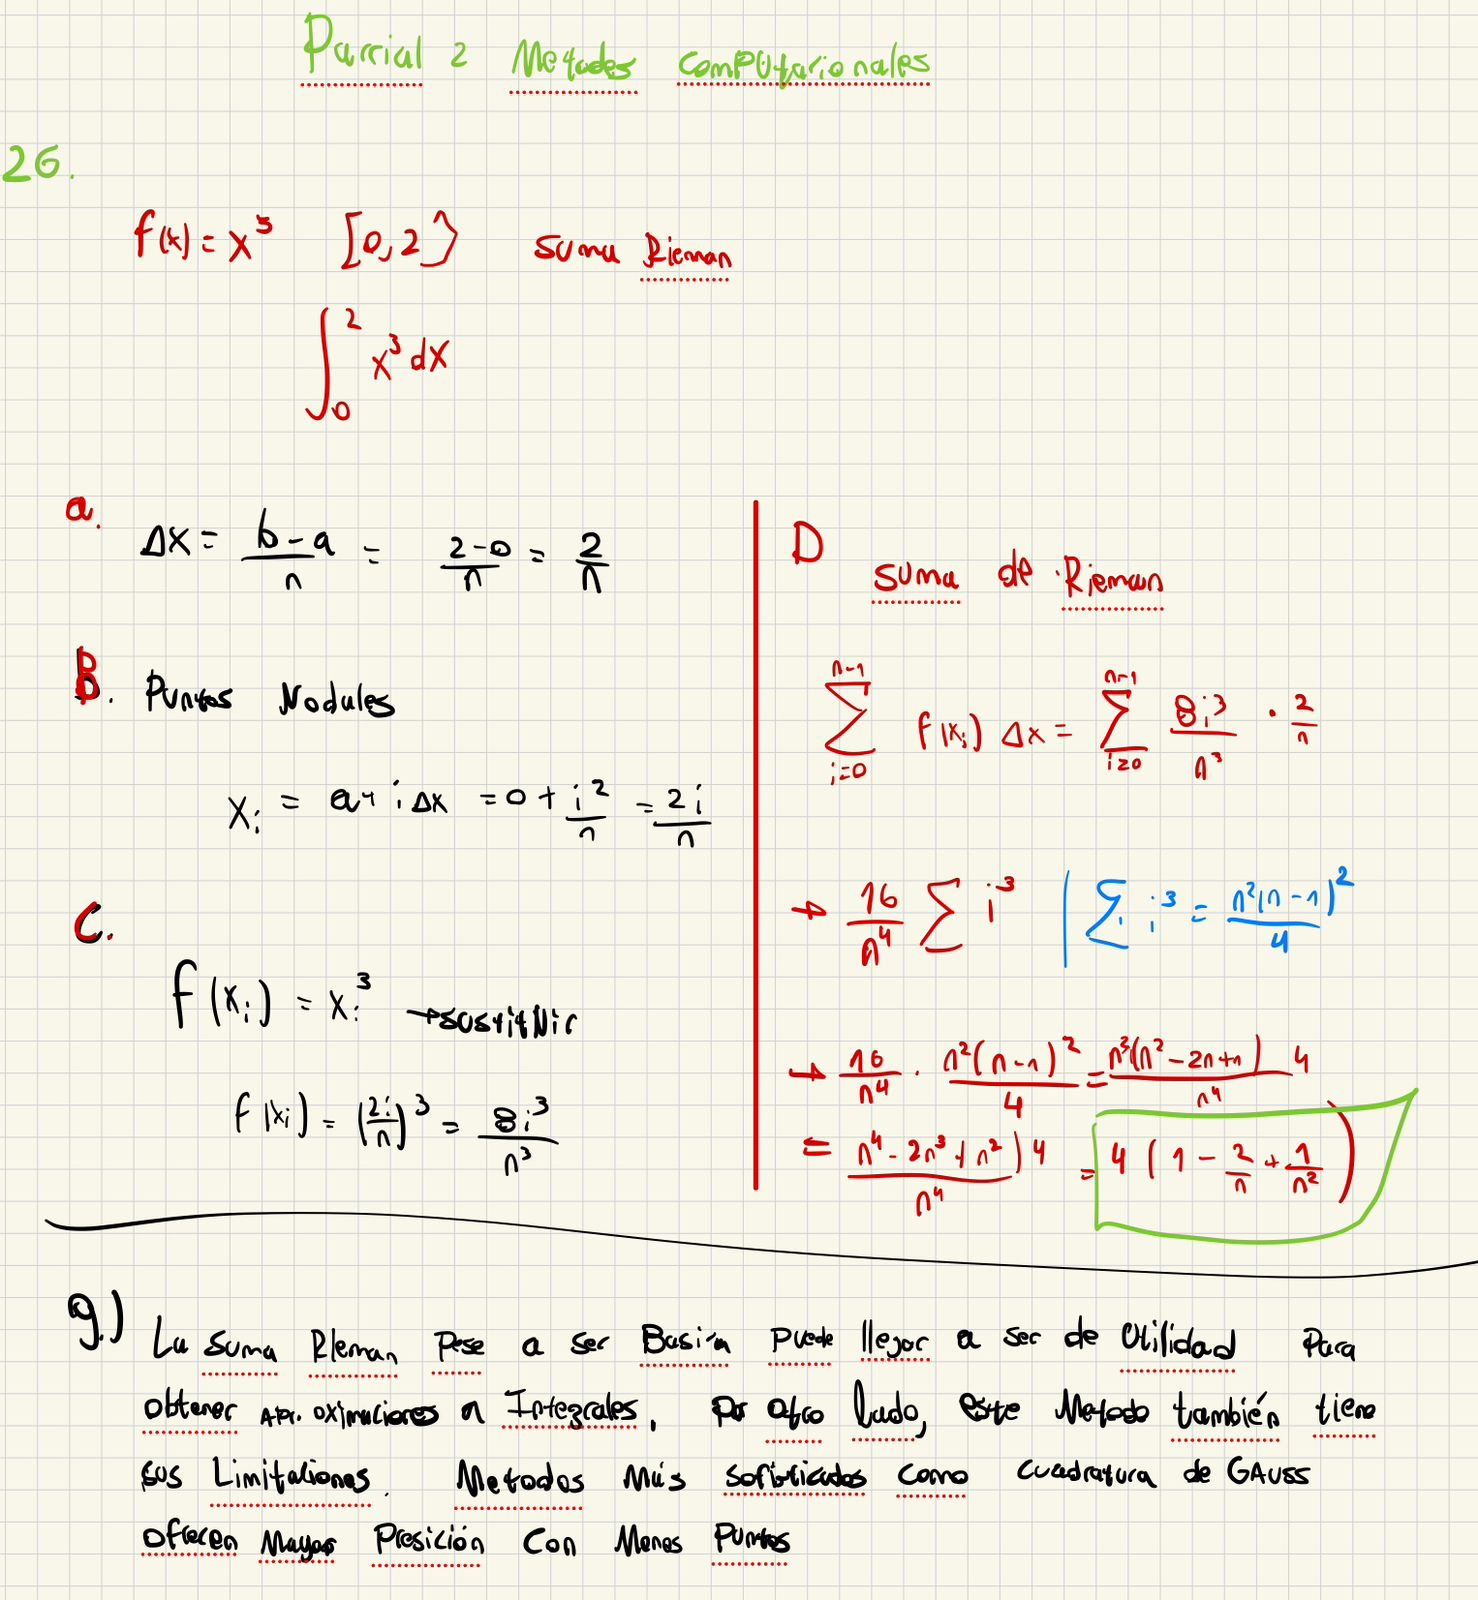

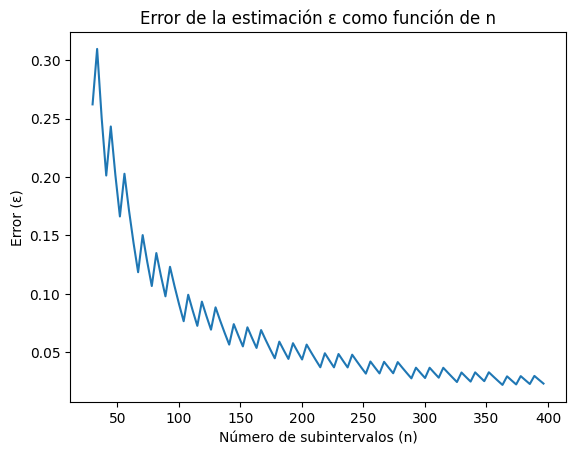

In [79]:
import numpy as np

def f(x):
    return x**3
a = 0
b = 2
n = 30
dx = (b - a) / n
x = np.linspace(a, b - dx, n)

riemann_sum = np.sum(f(x) * dx)
riemann_sum
import matplotlib.pyplot as plt
n_values = np.linspace(30, 400, 100, endpoint=False)
errors = []

for n in n_values:
    dx = (b - a) / n
    x = np.linspace(a, b - dx, int(n))
    riemann_sum = np.sum(f(x) * dx)
    error = abs(4 - riemann_sum)
    errors.append(error)
plt.plot(n_values, errors)
plt.xlabel('Número de subintervalos (n)')
plt.ylabel('Error (ε)')
plt.title('Error de la estimación ε como función de n')
plt.show()

In [80]:
#27
import numpy as np

# (a) Ecuaciones de la regla de cuadratura de Gauss de 4 puntos
# 1. ∫_{-1}^{1} x^0 dx = w0 + w1 + w2 + w3
# 2. ∫_{-1}^{1} x^1 dx = w0*x0 + w1*x1 + w2*x2 + w3*x3
# 3. ∫_{-1}^{1} x^2 dx = w0*x0^2 + w1*x1^2 + w2*x2^2 + w3*x3^2 = 2/3
# 4. ∫_{-1}^{1} x^3 dx = w0*x0^3 + w1*x1^3 + w2*x2^3 + w3*x3^3
# 5. ∫_{-1}^{1} x^4 dx = w0*x0^4 + w1*x1^4 + w2*x2^4 + w3*x3^4 = 2/5
# 6. ∫_{-1}^{1} x^5 dx = w0*x0^5 + w1*x1^5 + w2*x2^5 + w3*x3^5
# 7. ∫_{-1}^{1} x^6 dx = w0*x0^6 + w1*x1^6 + w2*x2^6 + w3*x3^6 = 2/7
# 8. ∫_{-1}^{1} x^7 dx = w0*x0^7 + w1*x1^7 + w2*x2^7 + w3*x3^7

def GetF(params):
    w = params[:4]
    x = params[4:]
    return np.array([
        np.sum(w) - 2,
        np.sum(w * x),
        np.sum(w * x**2) - (2 / 3),
        np.sum(w * x**3),
        np.sum(w * x**4) - (2 / 5),
        np.sum(w * x**5),
        np.sum(w * x**6) - (2 / 7),
        np.sum(w * x**7)
    ])

def Metric(F):
    return 0.5 * np.linalg.norm(F) ** 2

def GetJacobian(F, r, h=1e-3):
    n = len(r)
    J = np.zeros((len(F(r)), n))

    for i in range(len(F(r))):
        for j in range(n):
            r_forward = r.copy()
            r_backward = r.copy()

            r_forward[j] += h
            r_backward[j] -= h

            J[i, j] = (F(r_forward)[i] - F(r_backward)[i]) / (2 * h)

    return J

def Minimizer(r, lr=0.01, epochs=10000, error=1e-4):
    metric = 1
    it = 0

    while metric > error and it < epochs:
        F_val = GetF(r)
        metric = Metric(F_val)
        J = GetJacobian(GetF, r)


        r -= lr * J.T @ F_val

        # Cambiar la tasa de aprendizaje si la métrica es baja
        if metric < 0.005:
            lr = 0.001

        it += 1

    return r, it

def EstimateIntegral(weights, points):
    return np.sum(weights * np.cos(points))


r0 = np.random.uniform(-1, 1, size=8)
result, iterations = Minimizer(r0)


weights = result[:4]
points = result[4:]

print("Pesos encontrados:", weights)
print("Puntos de Gauss encontrados:", points)


integral_estimate = EstimateIntegral(weights, points)
print("Estimación de la integral:", integral_estimate)

Pesos encontrados: [ 1.01925025  0.64465642  0.53968957 -0.21022937]
Puntos de Gauss encontrados: [ 0.09187057 -0.75056807  0.78466412  0.16640243]
Estimación de la integral: 1.6609628653836324


In [81]:
#algoritmo genético
import numpy as np

class Robot:
    def __init__(self, cuotas, capital):
        self.cuotas = np.array(cuotas)
        self.capital = capital
        self.n_opciones = len(cuotas)


    def calcular_retorno(self, pesos):
        cuotas_inversas = 1.0 / self.cuotas
        retorno = self.capital * np.min(pesos * cuotas_inversas)
        return retorno

    def generar_poblacion_inicial(self, tam_poblacion):
        poblacion = []
        for _ in range(tam_poblacion):
            individuo = np.random.uniform(0., 1., size=self.n_opciones)
            individuo = individuo / np.sum(individuo)
            poblacion.append(individuo)
        return np.array(poblacion)

    def seleccion(self, poblacion, num_seleccionados):
        retornos = np.array([self.calcular_retorno(individuo) for individuo in poblacion])
        indices_mejores = np.argsort(retornos)[::-1]
        return poblacion[indices_mejores[:num_seleccionados]], retornos[indices_mejores[:num_seleccionados]]

    def cruce(self, padre1, padre2):
        punto_cruce = np.random.randint(1, self.n_opciones - 1)
        hijo = np.concatenate((padre1[:punto_cruce], padre2[punto_cruce:]))
        return hijo / np.sum(hijo)

    def mutacion(self, individuo, tasa_mutacion):
        for i in range(len(individuo)):
            if np.random.rand() < tasa_mutacion:
                individuo[i] = np.random.uniform(0., 1.)
        return individuo / np.sum(individuo)

    def evolucion_genetica(self, tam_poblacion=100, num_generaciones=100, num_seleccionados=20, tasa_mutacion=0.01):
        poblacion = self.generar_poblacion_inicial(tam_poblacion)

        for generacion in range(num_generaciones):
            mejores, retornos_mejores = self.seleccion(poblacion, num_seleccionados)

            print(f"Generación {generacion}: Mejor retorno = {retornos_mejores[0]:,.2f}")

            nueva_poblacion = []
            for _ in range(tam_poblacion):
                padre1, padre2 = mejores[np.random.randint(0, num_seleccionados)], mejores[np.random.randint(0, num_seleccionados)]
                hijo = self.cruce(padre1, padre2)
                hijo = self.mutacion(hijo, tasa_mutacion)
                nueva_poblacion.append(hijo)

            poblacion = np.array(nueva_poblacion)

        mejores, retornos_mejores = self.seleccion(poblacion, 1)
        return mejores[0], retornos_mejores[0]


cuotas = [8.51, 10.68, 12.24, 13.66, 15.37, 17.15, 19.66, 24.69]
capital = 1_000_000

robot = Robot(cuotas, capital)

mejor_pesos, mejor_retorno = robot.evolucion_genetica(tam_poblacion=100, num_generaciones=100, num_seleccionados=20, tasa_mutacion=0.01)

print(f"Mejor distribución de pesos: {mejor_pesos}")
print(f"Mejor retorno garantizado: {mejor_retorno:,.2f}")

Generación 0: Mejor retorno = 5,969.64
Generación 1: Mejor retorno = 6,264.26
Generación 2: Mejor retorno = 6,727.32
Generación 3: Mejor retorno = 7,262.11
Generación 4: Mejor retorno = 7,348.01
Generación 5: Mejor retorno = 7,544.31
Generación 6: Mejor retorno = 7,764.86
Generación 7: Mejor retorno = 7,795.61
Generación 8: Mejor retorno = 7,821.11
Generación 9: Mejor retorno = 7,857.75
Generación 10: Mejor retorno = 7,882.46
Generación 11: Mejor retorno = 7,880.32
Generación 12: Mejor retorno = 7,887.82
Generación 13: Mejor retorno = 7,901.01
Generación 14: Mejor retorno = 7,905.10
Generación 15: Mejor retorno = 7,910.60
Generación 16: Mejor retorno = 7,910.47
Generación 17: Mejor retorno = 7,916.16
Generación 18: Mejor retorno = 7,916.16
Generación 19: Mejor retorno = 7,917.47
Generación 20: Mejor retorno = 7,917.74
Generación 21: Mejor retorno = 7,917.83
Generación 22: Mejor retorno = 7,918.34
Generación 23: Mejor retorno = 7,918.67
Generación 24: Mejor retorno = 7,918.79
Generación